## Simulating Effective hydraulic conductivity ## 
(Devloped by Vibhu Batheja)

#### How to use the tool? ####

1. Go to the Collab / Live Code  by clicking the rocket button (top-right of the page)
2. Execute the code cell
3. Change the values of different quantities (layer thickness and corresponding conductivity) in the box and click the **run interact**.
4. For re-simulations - changes the input values in the boxes and click the "**run interact**" button. 

This tool can also be downloaded and run locally. For that download the [**_effective_K.ipynb_**](https://github.com/prabhasyadav/try1/blob/main/content/tools/effective_K.ipynb) file from the book GitHub site, and execute the process in any editor (e.g., JUPYTER notebook, JUPYTER lab) that is able to read and execute this file-type.

The codes are licensed under CC by 4.0 [(use anyways, but acknowledge the original work)](https://creativecommons.org/licenses/by/4.0/deed.en)

### Importing Libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

### Calculating Functions 

The main computation for effective hydraulic conductivity is done in this section.

In [3]:
def calculate_keff(heights, k_values, flow_direction):
    """
    Calculate the effective hydraulic conductivity (K_eff) using the given heights, K_values, and flow direction.

    Parameters:
        heights (list of floats): Heights corresponding to m in the equation.
        k_values (list of floats): K values corresponding to K in the equation.
        flow_direction (str): Flow direction, either 'Perpendicular' or 'Parallel'.

    Returns:
        float: Effective hydraulic conductivity (K_eff).
    """
    if len(heights) != len(k_values) or len(heights) == 0:
        raise ValueError("The lengths of heights and k_values lists should be the same and non-empty.")

    denominator = 0  # Initialize the denominator
    numerator_str = ''  # Initialize the numerator string
    denominator_str = ''  # Initialize the denominator string

    for i in range(len(heights)):
        if flow_direction == 'Parallel':
            numerator = heights[i] * k_values[i]
            numerator_str += f"({heights[i]}*{k_values[i]}+)"
            denominator_str += f"{heights[i]}+"
            denominator += heights[i]
        elif flow_direction == 'Perpendicular':
            numerator = heights[i]
            numerator_str += f"{heights[i]}+"
            denominator_str += f"({heights[i]}/{k_values[i]}+)"
            denominator += heights[i] / k_values[i]
        else:
            raise ValueError("Invalid flow_direction. It should be 'Perpendicular' or 'Parallel'.")

    # Remove the trailing '+' from the strings
    numerator_str = numerator_str.rstrip('+')
    denominator_str = denominator_str.rstrip('+')

    k_eff = numerator / denominator
    effective_string = f"({numerator_str})/({denominator_str})"
    print(effective_string)
    str2=(f"({numerator:.2f})/({denominator:.2f}) = {k_eff:.6f}= Keff")
    print(str2)
    eff_str=[effective_string,str2]

    return k_eff,eff_str


### Plotting Functions

Plotting of the Rectangles for the figure displayed after running the widgets is done through the function _plot pipe system_ section of the code. 

In [4]:


def plot_pipe_system(lengths,heights, materials, material_properties,k_values,flow_direction):
    """
    Plot the connected pipe system with rectangles of different widths in 2D.

    Parameters:
        heights (list of floats): Height of each section of the pipe (in meters).
        materials (list of strings): Pipe material for each section (matching the keys in the material_properties dictionary).
        material_properties (dict): Material properties dictionary with K values, colors, and hatch patterns for different pipe materials.
    """
    length = lengths  # Length of each section

    # Calculate the number of sections in the pipe system
    num_sections = len(heights)
    section_end_points = [0]
    hyd_head = []
    hyd_grad = []

    # Initialize the plot with a default figure size
    fig, ax = plt.subplots(figsize=(12, 6))

    # Initialize variables for the connected pipe system
    x_position = 0
    y_position = 0
    sum_height=0
    # Plot each section of the pipe system with rectangles of different widths and custom colors
    for i in range(num_sections):
        # Get the material properties for the current section
        material = materials[i]

        section_color = material_properties[material]['color']
        section_hatch = material_properties[material]['hatch']
        sum_height+=heights[i]
        # Add the rectangle representing the section and fill it with the custom color and hatch pattern
        rect = Rectangle((x_position, y_position), length, heights[i], linewidth=1, edgecolor='black', facecolor=section_color, hatch=section_hatch)
        ax.add_patch(rect)


        # Add the label for the section with better offset for label positioning

        label = f"Section {i+1}\nLength: {length:.2f} m\nHeight: {heights[i]:.2f} m\nMaterial: {material}"
        ax.annotate(label, xy=(x_position +1.5*length,sum_height-heights[i]),
                    xytext=(5, 5), textcoords="offset points", ha='left', va='bottom', fontsize=10, color='black')

        # Update x and y positions for the next section
        y_position += heights[i]
        section_end_points.append(y_position)

    k_eff, iterations_info = calculate_keff(heights, k_values, flow_direction)
    label=iterations_info[0]

    ax.annotate("Calculation Steps", xy=(x_position -2*length,2*sum(heights)/len(heights)+max(heights)/4),
                    xytext=(5, 5), textcoords="offset points", ha='left', va='bottom', fontsize=10, color='black')
    #ax.annotate(label, xy=(x_position -2*length,2*sum(heights)/len(heights)),
     #               xytext=(5, 5), textcoords="offset points", ha='left', va='bottom', fontsize=10, color='black')
    ax.annotate(iterations_info[1], xy=(x_position -2*length,2*sum(heights)/len(heights)-max(heights)/4),
                    xytext=(5, 5), textcoords="offset points", ha='left', va='bottom', fontsize=10, color='black')







    arrow_post=sum(heights)/len(heights)

    if flow_direction == "Parallel" :
      ax.arrow(section_end_points[0]-length,arrow_post, length/4, 0, head_width=length/8, head_length=length/8, fc='blue', ec='blue')
      label = "Q"
      ax.annotate(label, xy=(section_end_points[0]-length, arrow_post+0.52), fontsize=15)

    if flow_direction == "Perpendicular" :
    # Add an arrow indicating the direction of flow at the start of the system (pointing upwards)
      ax.arrow(-50,0,0,arrow_post, head_width=min(heights)/6, head_length=min(heights)/6, fc='blue', ec='blue')
      label = "Q"
      ax.annotate(label, xy=(section_end_points[0]-length+5, arrow_post+0.52), fontsize=15)

    # Set plot labels and title
    #plt.xlabel("")
    plt.ylabel("Elevation")
    plt.title("Effective Hydraulic Conductivity")
    plt.grid(False)

    # Adjust the axis limits to zoom out the plot and provide some extra space
    plt.xlim(section_end_points[0]-lengths*2, lengths + lengths*2)  # Adding extra space of 20 units on each side of the x-axis
    plt.ylim(-1, max(1, y_position) + 1)  # Adjusting the y-axis limits to include all elevations

    plt.tight_layout()  # Improve layout to prevent overlapping labels
    plt.show()


### Creating Widgets 

This section of code is used to create widgets to assist with data entry into the code, you can modify the color of the layers or add new materials by changing the _material properties_ dictionay. 

(4.0+5.0+6.0)/((4.0/0.03+)(5.0/12.0+)(6.0/0.5+))
(6.00)/(145.75) = 0.041166= Keff


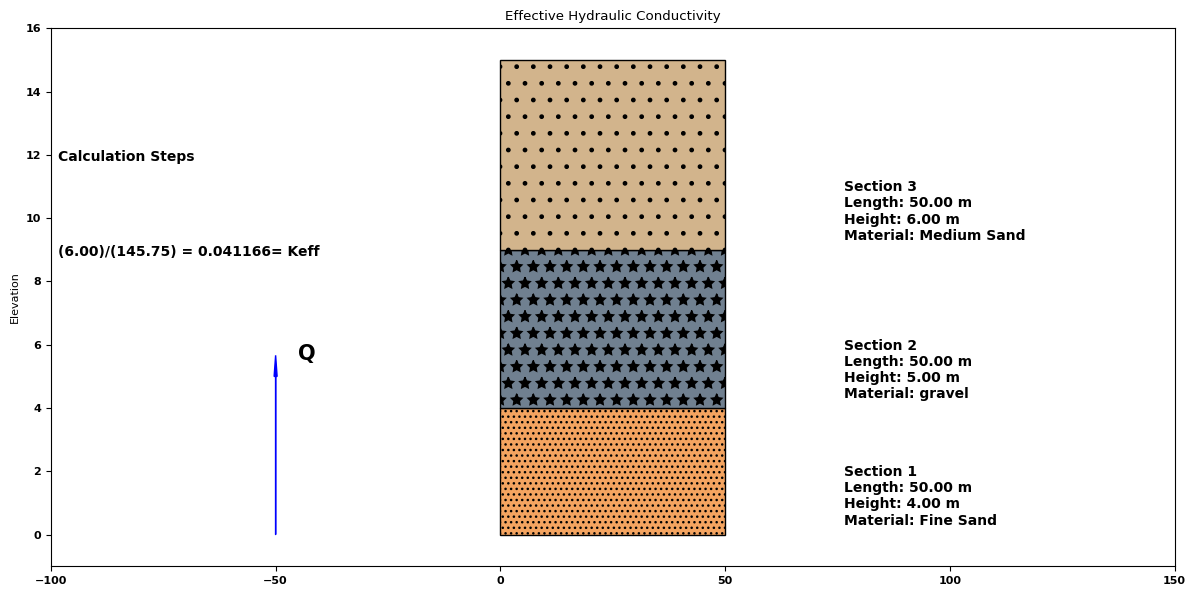

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize empty lists to store data
heights = []
k_values = []
materials = []
flow_direction = 'Perpendicular'

def run_interact(num_sections):
    global heights, k_values, materials, flow_direction
    style = {'description_width': 'initial'}
    heights_textboxes = [widgets.FloatText(value=1.0, description=f'Height {i+1} (m)',style=style) for i in range(num_sections)]
    kvalues_textboxes = [widgets.FloatText(value=1.0, description=f'K {i+1} (m/s) *10^-3',style=style) for i in range(num_sections)]
    #materials_dropdowns = [widgets.Dropdown(options=['clay', 'finesand', 'gravel'], description=f'Material {i+1}') for i in range(num_sections)]
    flow_direction_dropdown = widgets.Dropdown(options=['Perpendicular', 'Parallel'], description='Flow Direction')

    def update_data(change):
        global heights, k_values, materials, flow_direction
        heights = [textbox.value for textbox in heights_textboxes]
        k_values = [textbox.value for textbox in kvalues_textboxes]
        #materials = [dropdown.value for dropdown in materials_dropdowns]
        flow_direction = flow_direction_dropdown.value

    for textbox in heights_textboxes:
        textbox.observe(update_data, 'value')

    for textbox in kvalues_textboxes:
        textbox.observe(update_data, 'value')

    #for dropdown in materials_dropdowns:
        #dropdown.observe(update_data, 'value')

    flow_direction_dropdown.observe(update_data, 'value')

    run_button = widgets.Button(description='Run Interact')

    def on_run_button_clicked(b):
        clear_output(wait=True)
        display(widgets.VBox(heights_textboxes + kvalues_textboxes  + [flow_direction_dropdown, run_button]))
        materials = []
        for k in k_values:
            k=k*1e-3
            if k > 1e-1:
                materials.append("gravel")
            elif 1e-2 <= k < 1e-1:
                materials.append("gravel")
            elif 1e-3 <= k < 1e-2:
                materials.append("Coarse Sand")
            elif 1e-4 <= k < 1e-3:
                materials.append("Medium Sand")
            elif 1e-5 <= k < 1e-4:
                materials.append("Fine Sand")
            elif 1e-9 <= k < 1e-5:
                materials.append("Silt")
            elif k < 1e-9:
                materials.append("Clay")

        # Material properties dictionary with K values, colors, and hatch patterns for different pipe materials
        material_properties = {
            'Clay': { 'color': 'khaki', 'hatch': '////'},
            'Silt': { 'color': 'lightsteelblue', 'hatch': '////'},
            'Fine Sand': { 'color': 'sandybrown', 'hatch': '...'},
            'Medium Sand': { 'color': 'tan', 'hatch': '.'},
            'Coarse Sand': { 'color': 'darkgoldenrod', 'hatch': '+'},
            'gravel': { 'color': 'slategrey', 'hatch': '*'}
        }
        lengths=50

        # Call the plotting function with the data stored in the lists
        plot_pipe_system(lengths,heights, materials, material_properties,k_values,flow_direction)


        #plot_pipe_system(lengths, heights, materials, k_values, flow_direction)

    run_button.on_click(on_run_button_clicked)

    display(widgets.VBox(heights_textboxes + kvalues_textboxes + [flow_direction_dropdown, run_button]))

num_sections_slider = widgets.IntSlider(min=1, max=10, description='Number of Sections')
widgets.interact(run_interact, num_sections=num_sections_slider)
